# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset actually encapsulates 17 distinct telemarketing campaigns conducted by the Portuguese bank between May 2008 and November 2010.
Each instance includes data such as the number of calls made during that specific campaign to each client, among other features.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



'unknown' should be treated as placeholder for missing values. 

columns of `job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome` need to be convert to `category` dtype
column `duration` should be dropped as it leaks outcome, as explained in UCI description
column `y`: target column needed for classifiers


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Drop 'duration' column (target leakage)
df.drop(columns=['duration'], inplace=True)


# Convert 'y' target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
# Create a binary flag for 'was_previously_contacted'
df['was_previously_contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

# drop or keep 'pdays' depending on analysis
df.drop(columns=['pdays'], inplace=True)

# Convert appropriate columns to 'category' dtype
categorical_cols = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome'
]

# Handle 'unknown' values: Convert to NaN for imputation
df[categorical_cols] = df[categorical_cols].replace('unknown', np.nan)
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Label encode categorical columns for classifiers like logistic regression or SVM
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder if needed for inverse transform



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       41188 non-null  int64  
 1   job                       41188 non-null  int64  
 2   marital                   41188 non-null  int64  
 3   education                 41188 non-null  int64  
 4   default                   41188 non-null  int64  
 5   housing                   41188 non-null  int64  
 6   loan                      41188 non-null  int64  
 7   contact                   41188 non-null  int64  
 8   month                     41188 non-null  int64  
 9   day_of_week               41188 non-null  int64  
 10  campaign                  41188 non-null  int64  
 11  previous                  41188 non-null  int64  
 12  poutcome                  41188 non-null  int64  
 13  emp.var.rate              41188 non-null  float64
 14  cons.p

* To predict whether a customer will subscribe to a term deposit based on data collected from direct marketing campaigns, in order to optimize future campaign targeting, reduce costs, and improve conversion rates.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Done in the privious step

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
# Final dataset is ready to split and use for training
X = df.drop(columns=['y'])
y = df['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

- establishing a baseline helps us determine whether our models are actually learning something useful.

In [12]:
# Baseline accuracy = proportion of the majority class in training data
baseline_accuracy = max(y_train.mean(), 1 - y_train.mean())
print(f"Baseline accuracy: {baseline_accuracy:.3f}")

Baseline accuracy: 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Initialize and train the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Step 2: Predict on the test set
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]  # for ROC AUC

# Step 3: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9007040543821316
ROC AUC: 0.7953995471484504

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238


Confusion Matrix:
[[7229   81]
 [ 737  191]]


### Problem 9: Score the Model

What is the accuracy of your model?

0.90

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier


# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN model
knn = KNeighborsClassifier()  # Default k=5

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Evaluate performance
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Train Accuracy: 0.91350531107739
Test Accuracy: 0.8969410050983249

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.59      0.28      0.38       928

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238


Confusion Matrix:
 [[7128  182]
 [ 667  261]]


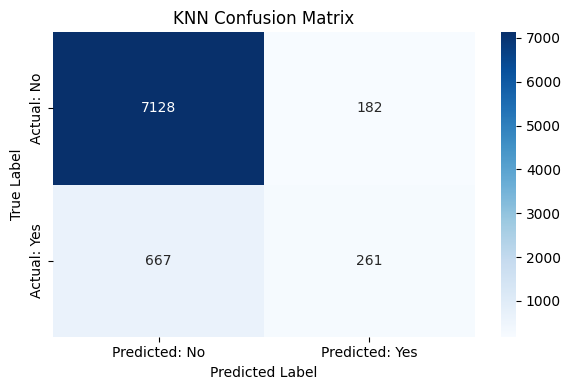

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Train Accuracy: 0.9953869499241275
Test Accuracy: 0.8392813789754795

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.30      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238



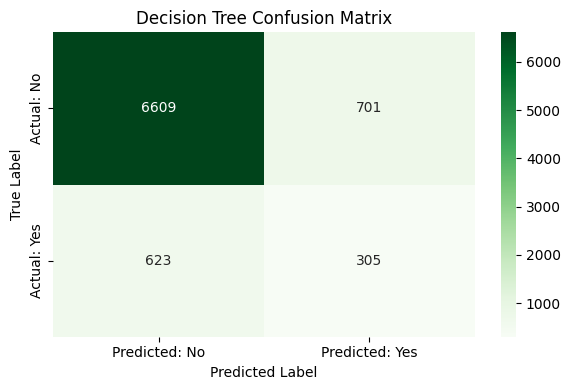

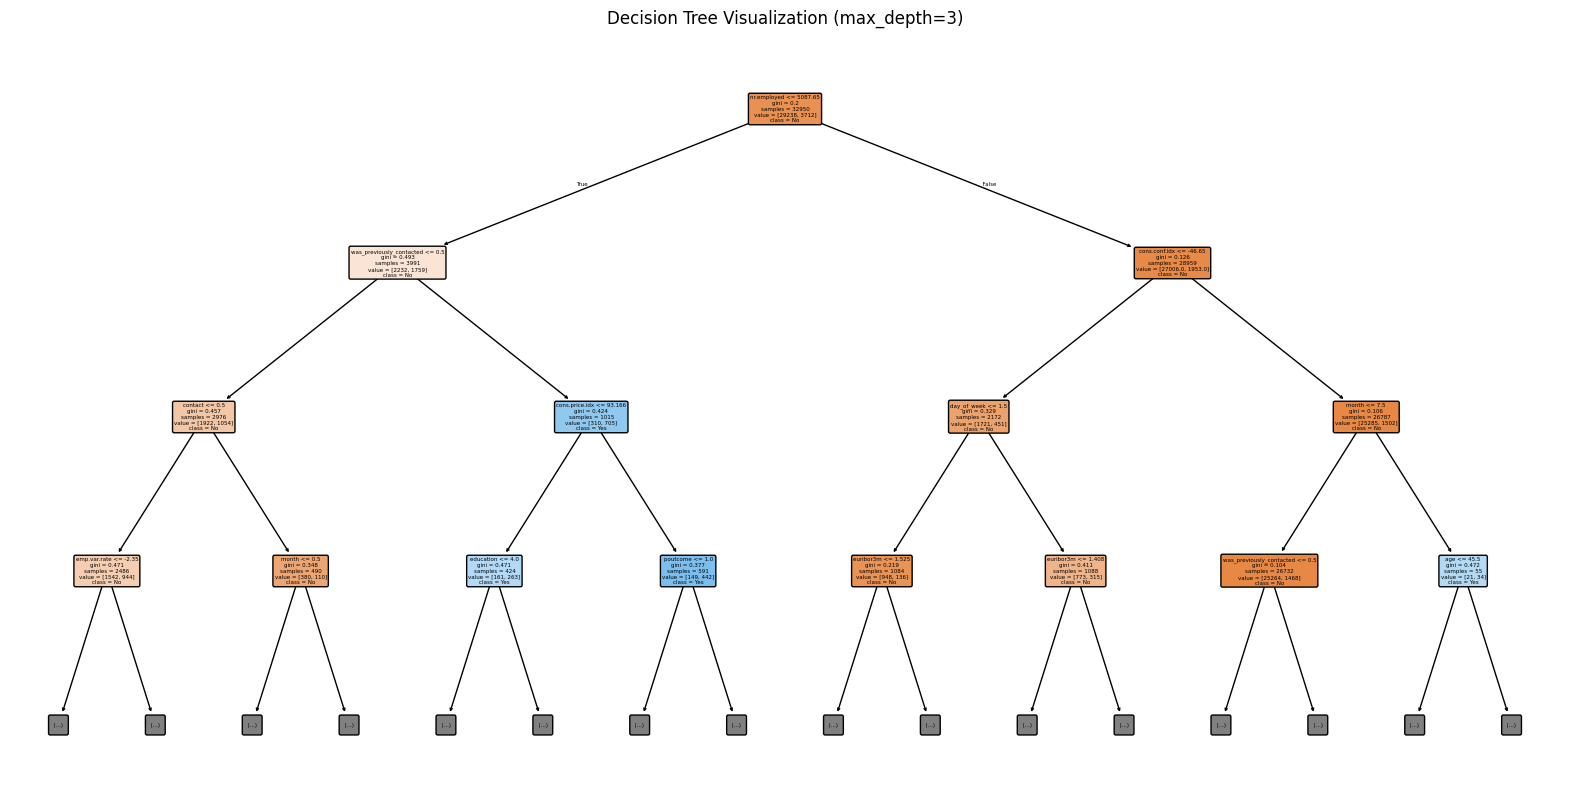

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# STEP 1: Split your already preprocessed dataset

# STEP 2: Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# STEP 3: Predict
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# STEP 4: Evaluate
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# STEP 5: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# STEP 6: Visualize Decision Tree (limited depth for clarity)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True,
          max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

Train Accuracy: 0.9039453717754173
Test Accuracy: 0.9030104394270454

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.71      0.24      0.36       928

    accuracy                           0.90      8238
   macro avg       0.81      0.61      0.65      8238
weighted avg       0.89      0.90      0.88      8238



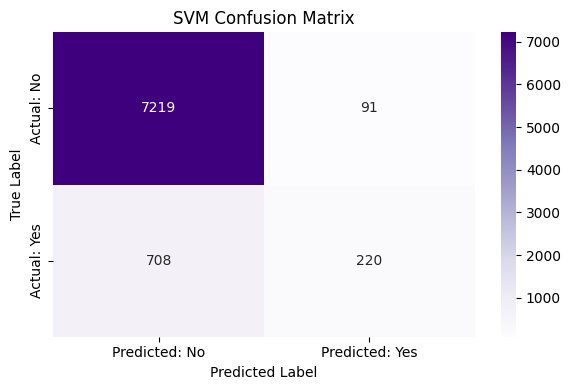

In [19]:
from sklearn.svm import SVC


# STEP 1: Feature Scaling (SVM is sensitive to feature magnitudes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 2: Initialize and train the SVM model (default is RBF kernel)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# STEP 3: Predict
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# STEP 4: Evaluate
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# STEP 5: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples",
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

| Model | Train Time | Train Accuracy | Test Accuracy |
| --------- | ---------- | -------------  | -----------   |
|Logistic Regression |	0.039 sec	|0.54875|	0.46500|
|KNN|	0.0399 sec|	6.9250|	0.42500|
|Decision Tree|	0.120 sec	|1.00000	|0.45000|
|SVM	|0.0664 sec	|10.3125	|0.52000|

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
In general: No — Using gender can introduce bias or even legal risk in financial decisions (e.g., targeting for term deposits).
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
Absolutely — hyperparameter tuning is essential to improve your model beyond default settings. -- using GridSearchCV
- Adjust your performance metric
Adjusting your performance metric is a critical step, especially when:
The dataset is imbalanced (like the Bank Marketing dataset: ~88% “no” to ~12% “yes”)


In [20]:
from sklearn.model_selection import GridSearchCV

# ---- KNN Grid Search ----

knn_params = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean distance
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN Params:", knn_grid.best_params_)
print("Best KNN Accuracy:", knn_grid.best_score_)

# ---- Decision Tree Grid Search ----

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best DT Accuracy:", dt_grid.best_score_)


Best KNN Params: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best KNN Accuracy: 0.8960242792109255
Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best DT Accuracy: 0.8997572078907435


##### Questions